# Russian Troll Tweets Analysis


In [3]:
# Basic library loading
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
troll.isnull().sum().sort_values(ascending = False)

in_reply_to_status_id    202923
retweeted_status_id      163831
retweet_count            145399
retweeted                145399
favorite_count           145399
source                   145398
user_id                    8065
tweet_id                   2314
created_at                   21
created_str                  21
text                         21
user_key                      0
hashtags                      0
expanded_urls                 0
posted                        0
mentions                      0
dtype: int64

We see around 21 missing values in the text column. Since this is the critical column to be analyzed, **we will drop rows with NaNs in the text column**

In [6]:
# drop NAs in the text column and update the troll dataframe
troll.dropna(subset = ['text'], inplace = True)

Lets check the data types of the columns and convert the *created_str* to datetime if its not already that way.

In [7]:
print(troll.dtypes)

user_id                  float64
user_key                  object
created_at               float64
created_str               object
retweet_count            float64
retweeted                 object
favorite_count           float64
text                      object
tweet_id                 float64
source                    object
hashtags                  object
expanded_urls             object
posted                    object
mentions                  object
retweeted_status_id      float64
in_reply_to_status_id    float64
dtype: object


In [8]:
# convert created_str to datetime format
troll['created_str'] = pd.to_datetime(troll['created_str'])

# convert ids to object datatype
columns = ['user_id', 'tweet_id', 'retweeted_status_id', 
           'retweeted_status_id', 'in_reply_to_status_id']

for column in columns:
    troll[column] = troll[column].astype('object')

Check data types of output dataframe! Always good to do when you are just beginning! :)

In [9]:
troll.dtypes

user_id                          object
user_key                         object
created_at                      float64
created_str              datetime64[ns]
retweet_count                   float64
retweeted                        object
favorite_count                  float64
text                             object
tweet_id                         object
source                           object
hashtags                         object
expanded_urls                    object
posted                           object
mentions                         object
retweeted_status_id              object
in_reply_to_status_id            object
dtype: object

In [10]:
start_date_tweet = troll['created_str'].min()
end_date_tweet = troll['created_str'].max()

print(start_date_tweet, end_date_tweet)

2014-07-14 18:04:55 2017-09-26 09:05:32


We have ~3 years of tweets starting **14th July 2014** until the **26th of September 2017**! Times appear with these dates, so let's create a new column to hold only the date component of this! 

In [11]:
# created_str_data holds the date component of the created_str column
troll['created_str_date'] = pd.to_datetime(troll['created_str'].dt.date)

In [12]:
# Count the number of times a date appears in the dataset and convert to dataframe
tweet_trend = pd.DataFrame(troll['created_str_date'].value_counts())

# index is date, columns indicate tweet count on that day
tweet_trend.columns = ['tweet_count']

# sort the dataframe by the dates to have them in order
tweet_trend.sort_index(ascending = True, inplace = True)

<ipython-input-13-30df8e8c353d>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Tweet Count')

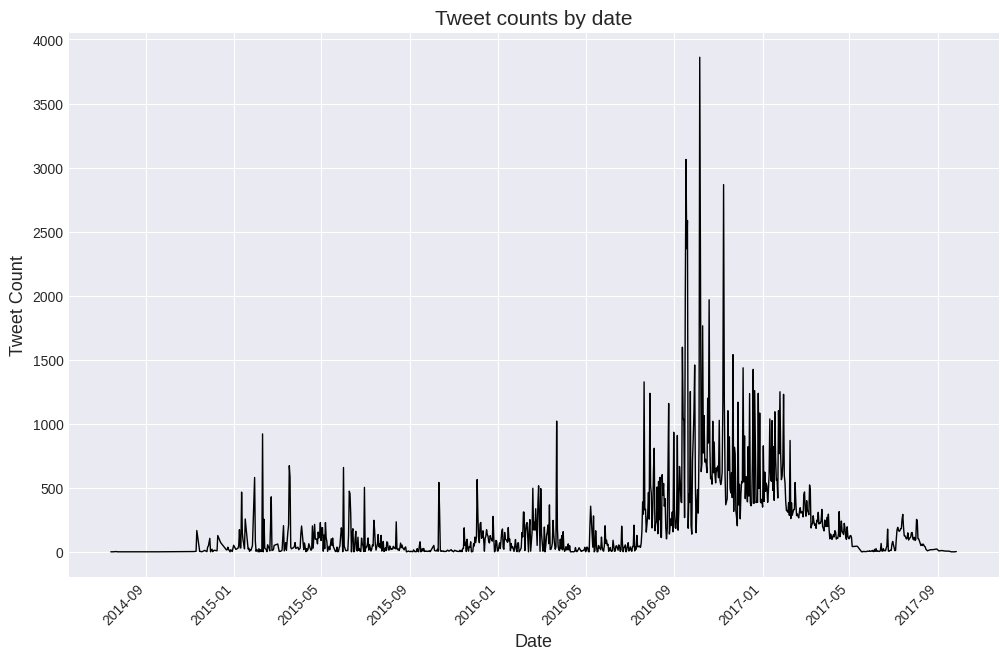

In [13]:
# make a line plot of the tweet count data and give some pretty labels! ;)
# the 'rot' argument control x-axis ticks rotation
plt.style.use('seaborn-darkgrid')
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (12,8), rot = 45, color = 'k',
                               linewidth = 1)
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)

In [14]:
# these are dates corresponding to important dates from the trump campaign.
dates_list = ['2015-06-16', '2015-12-07', '2016-02-01',
              '2016-03-01', '2016-03-03', '2016-03-11',
              '2016-05-03', '2016-05-26', '2016-06-20', 
              '2016-07-15', '2016-07-21', '2016-08-17',
              '2016-09-01', '2016-10-07', '2016-11-08']

# create a series of these dates.
important_dates = pd.Series(pd.to_datetime(dates_list))

# add columns to identify important events, and mark a 0 or 1.
tweet_trend['Important Events'] = False
tweet_trend.loc[important_dates, 'Important Events'] = True
tweet_trend['values'] = 0
tweet_trend.loc[important_dates, 'values'] = 1

<ipython-input-15-505c36070928>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


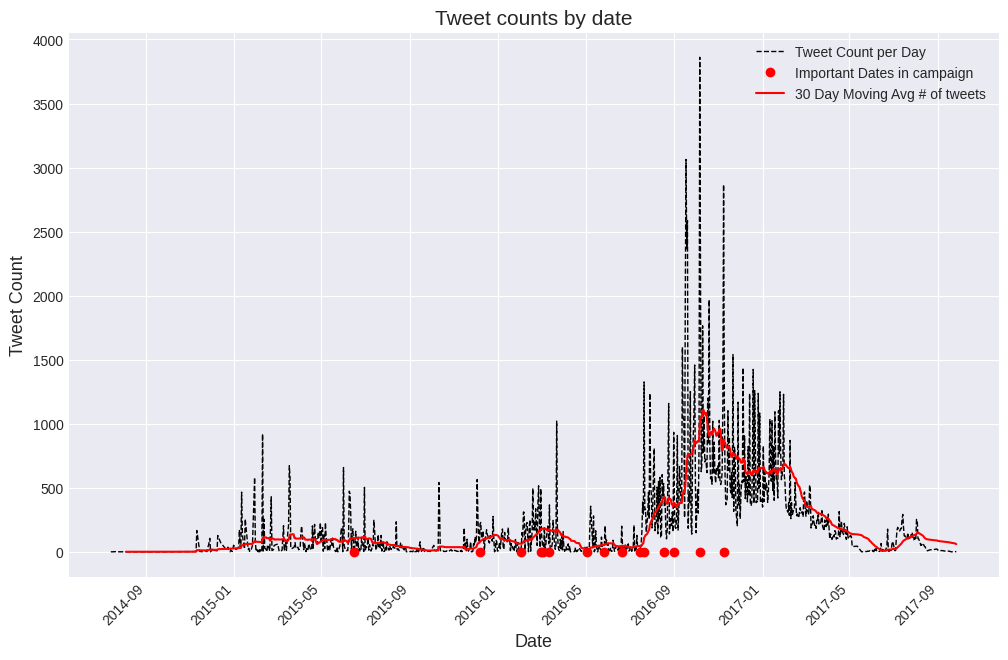

In [15]:
# plot the line chart for trend, a monthly average of tweet counts and add red dots to 
# mark important events.
plt.style.use('seaborn-darkgrid')
tweet_trend['tweet_count'].plot(linestyle = "--", 
                                figsize = (12,8), rot = 45, 
                                color = 'k',
                                label = 'Tweet Count per Day',
                               linewidth = 1)

# plot dots for where values in the tweet_trend df are 1
plt.plot(tweet_trend[tweet_trend['Important Events'] == True].index.values,
         tweet_trend.loc[tweet_trend['Important Events'] == True, 'values'],
         marker = 'o', 
         color = 'r',
         linestyle = 'none',
        label = 'Important Dates in campaign')

# Lets add a 30 day moving average on top to view the trend! Min_periods tells rolling() to
# use 10 points if 30 not available!
plt.plot(tweet_trend['tweet_count'].rolling(window = 30, min_periods = 10).mean(), 
         color = 'r', 
         label = '30 Day Moving Avg # of tweets')
plt.title('Tweet counts by date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)
plt.legend(loc = 'best')

**The US president was elected on 8th November 2016 - the last red dot on the chart. We see a lot of tweet activity near the end of his campaign.** 

We can also calculate the percentage change in tweet counts between subsequent dates and then see if an important date relates with a spike!

In [16]:
# Calculate the percentage change in tweet counts
tweet_trend['Pct_Chg_tweets'] = tweet_trend['tweet_count'].pct_change()*100

# Lets see values only for the important dates. This Pct_Chg_tweets shows us the percentage
# change in tweets for the day of the event versus the previous day!
tweet_trend.loc[tweet_trend['values'] == 1,['tweet_count', 'Pct_Chg_tweets']]

,tweet_count,Pct_Chg_tweets
2015-06-16,3,50.000000
2015-12-07,219,204.166667
2016-02-01,18,1700.000000
2016-03-01,143,-71.052632
2016-03-03,6,-92.105263
2016-03-11,64,-69.523810
2016-05-03,38,216.666667
2016-05-26,6,-50.000000
2016-06-20,201,1156.250000
2016-07-15,47,17.500000


<ipython-input-17-3c5db2109797>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Tweet Count Change')

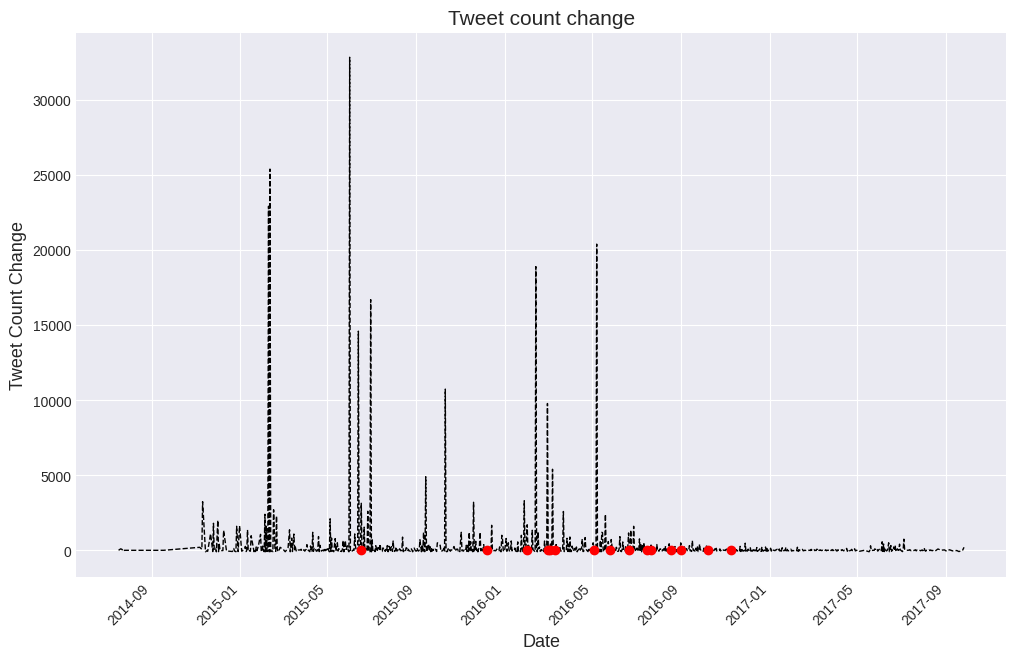

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# line plot of the percentage change in tweet counts
tweet_trend['Pct_Chg_tweets'].plot(linestyle = "--", figsize = (12,8), rot = 45, 
                                   color = 'k',
                                  linewidth = 1)
# add the dots for important events!
plt.plot(tweet_trend[tweet_trend['Important Events'] == True].index.values,
         tweet_trend.loc[tweet_trend['Important Events'] == True, 'values'],
         marker = 'o', 
         color = 'r',
         linestyle = 'none')
plt.title('Tweet count change', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count Change', fontsize = 13)

In [18]:
# take a look at what the 'text' column holds
troll['text'].head(10)

0    #IslamKills Are you trying to say that there w...
1    Clinton: Trump should’ve apologized more, atta...
2    RT @ltapoll: Who was/is the best president of ...
3    RT @jww372: I don't have to guess your religio...
4    RT @Shareblue: Pence and his lawyers decided w...
5                               @ModicaGiunta me, too!
6    RT @MDBlanchfield: You’ll never guess who twee...
7    RT @100PercFEDUP: New post: WATCH: DIAMOND AND...
8    RT @AriaWilsonGOP: 3 Women Face Charges After ...
9    One of the ways to remind that #BlackLivesMatt...
Name: text, dtype: object

The table above shows that  - <br>
1. **Retweets** begin with the **keyword 'RT'**. These are followed by _@userkey_.
2. **Hashtags** begin with a **_#_** and are one continuous string with a space next to them!
3. **Links** begin with **_https://_ or _http://_** and can be present anywhere in the string.
4. **There can be multiple links and hashtags in a tweet, but retweet identifier is just one.**
5. **User mentions** begin with **'@'** and are a continuous word!

**First let's remove the RT mentions from tweets.**

In [19]:
# define a function that takes in a tweet and throws out the text without the RT.
def remove_retweet(tweet):
    '''Given a tweet, remove the retweet element from it'''
    text_only = []
    if len(re.findall("^RT.*?:(.*)", tweet)) > 0:
        text_only.append(re.findall("^RT.*?:(.*)", tweet)[0])
    else:
        text_only.append(tweet)
    return text_only[0]

# extract texts and place in a list
text_only = troll['text'].map(remove_retweet)

**Next, let's remove the links from these tweet texts so that we have a column for just the tweet text devoid of any links and RT mentions.**

In [20]:
# this method checks for links and removes these from the tweet provided!
def remove_links(tweet):
    '''Provide a tweet and remove the links from it'''
    text_only = []
    if len(re.findall("(https://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(https://[^\s]+)", "", tweet)
    if len(re.findall("(http://[^\s]+)", tweet)) > 0:
        tweet = re.sub("(http://[^\s]+)", "", tweet)    
    text_only.append(tweet)
    return text_only[0]

text_no_links = text_only.map(remove_links)

**Lets remove hashtags from these!**

In [21]:
def remove_hashtags(tweet):
    '''Provide a tweet and remove hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        tweet = re.sub("(#[^#\s]+)", "", tweet) 
    hashtags_only.append(tweet)
    return hashtags_only[0]

text_all_removed = text_no_links.map(remove_hashtags)

**Let's remove all extra spaces from the beginning and the end of the text that we got!**

In [22]:
def remove_extraneous(tweet):
    '''Given a text, remove unnecessary characters from the beginning and the end'''
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    tweet = tweet.rstrip(")")
    tweet = tweet.lstrip("(")
    tweet = re.sub("\.", "", tweet)
    return tweet

text_clean = text_all_removed.map(remove_extraneous)

**At last, we remove the user mentions from the text_clean** But before we do that, lets store these user mentions in a new column within the dataframe!

In [23]:
# in case no mention present, we return "0"
def extract_mentions(tweet):
    '''Given a tweet, this function returns the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        mentions.append(re.findall('@([^\s@]+)', tweet))
    else:
        mentions.append(["0"])
    return mentions[0]

# Put the user mentions in a new column in our dataframe
troll['user_mentions'] = text_clean.map(extract_mentions)

In [24]:
# Now lets remove the mentions from the tweet text
def remove_mentions(tweet):
    '''Given a text, remove the user mentions'''
    mentions = []
    if len(re.findall('@[^\s@]+', tweet))>0:
        tweet = re.sub('@[^\s@]+', "" , tweet)
        mentions.append(tweet)
    else:
        mentions.append(tweet)
    return mentions[0]

text_clean_final = text_clean.map(remove_mentions)

With the cleaned tweet text now available to us in the _Text_clean_ list, let's append it to our dataframe!

In [25]:
troll['tweet_text_only'] = text_clean_final

In [26]:
# in case hashtags are not found, we will use "0" as the placeholder
def extract_hashtags(tweet):
    '''Provide a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)", tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

# make a new column to store the extracted hashtags and view them!
troll['tweet_hashtags'] = troll['text'].map(extract_hashtags)
troll['tweet_hashtags'].head(10)

0                          [#IslamKills]
1                                    [0]
2                                    [0]
3                  [#ChristmasAftermath]
4                                    [0]
5                                    [0]
6                                    [0]
7                                    [0]
8                                    [0]
9    [#BlackLivesMatter, #BlackPressDay]
Name: tweet_hashtags, dtype: object

Nect we need to extract all unique hashtags from the hashtags column just created and take a value count on those!

In [27]:
# create a list of all hashtags
all_hashtags = troll['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

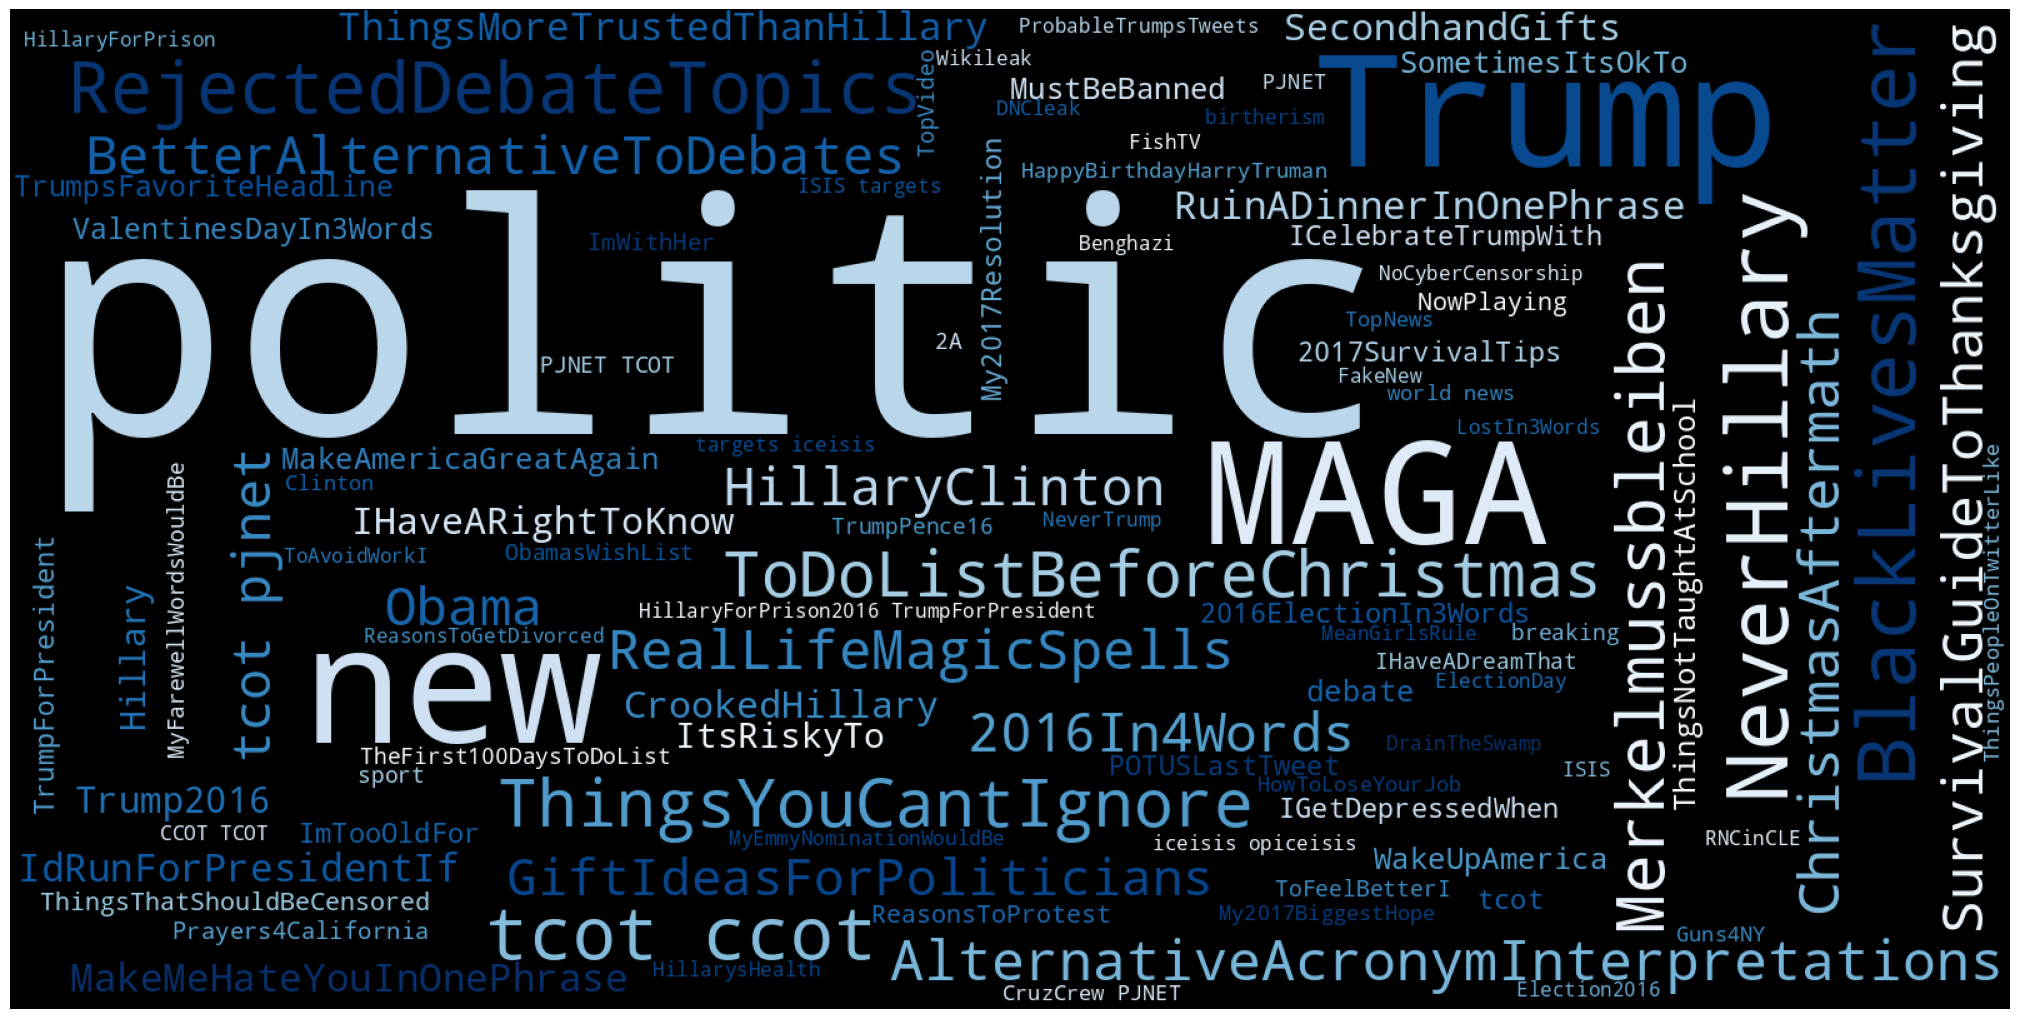

In [28]:
# Get hashtag terms from the series and convert to list
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# convert list to one string with all the words
hashes_words = " ".join(hashes)

# generate the wordcloud. the max_words argument controls the number of words on the cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width= 1600, height = 800, 
                      relative_scaling = 1.0, 
                      colormap = "Blues",
                     max_words = 100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<ipython-input-29-8b6c126e6dbe>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'Hashtags')

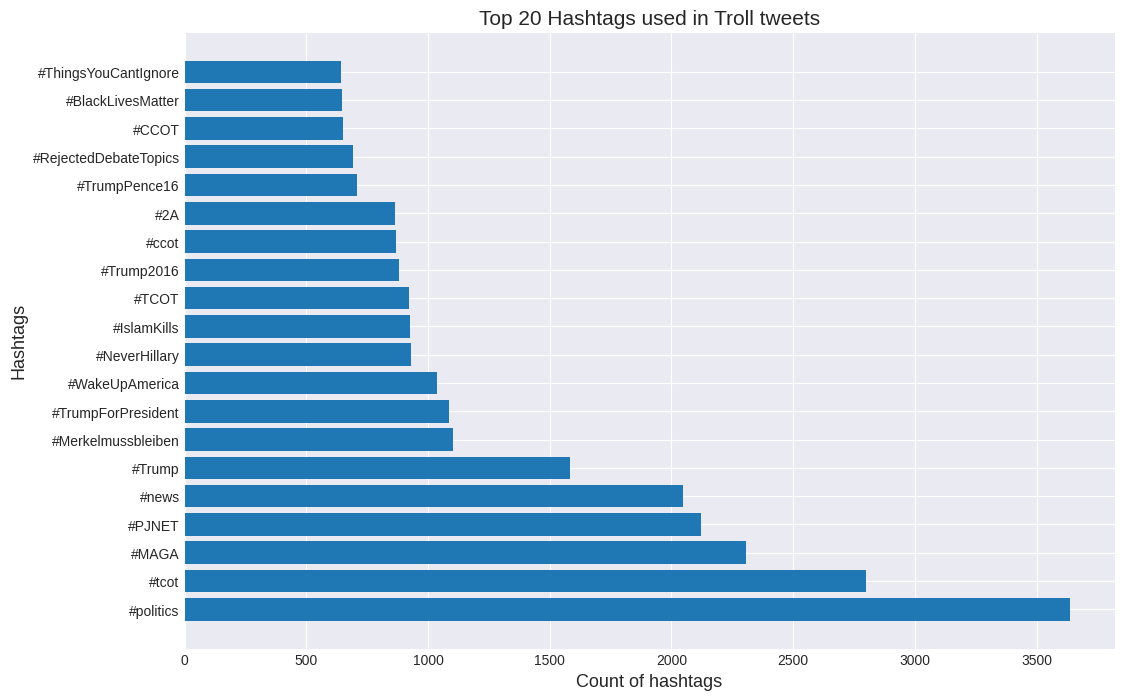

In [29]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (12,8))
plt.barh(y = hashtag_counts[1:21].index.values, width = hashtag_counts[1:21])
plt.title("Top 20 Hashtags used in Troll tweets", fontsize = 15)
plt.xlabel('Count of hashtags', fontsize = 13)
plt.ylabel('Hashtags', fontsize = 13)

Looking at the top hashtags, we find that the most common hashtags in use - <br>
1. **#TCOT**  
2. **#POLITICS** 
3. **#PJNET**
4. **#MAGA**
5. **#Trump**

are all in support of the current president's campaign! Looks like the trolls were mostly supporting his candidacy!

Among the top 20 used hashtags, we see that  **#WAKEUPAMERICA, #P2, @HILLARY** are against the candidacy but these have been used far fewer times than others!


In [31]:
# For the top 6 hashtags, lets calculate how many times that appears against each date!
count_dict = {}
for i in hashtag_counts.index.values[1:7]:
    count_hash = []
    for j in all_hashtags:
        count_hash.append(j.count(i))
    count_dict[i] = count_hash

In [32]:
# create a dataframe from the hashtags
hashtag_count_df = pd.DataFrame(count_dict)

# concatenate this dataframe with the hashtag_count_df
hashtag_count_df = pd.concat([hashtag_date_df, hashtag_count_df], axis = 1)

In [33]:
hashtag_count_df.head()

,created_str_date,tweet_hashtags,#politics,#tcot,#MAGA,#PJNET,#news,#Trump
0,2016-03-22,[#IslamKills],0,0,0,0,0,0
1,2016-10-10,[0],0,0,0,0,0,0
2,2017-02-22,[0],0,0,0,0,0,0
3,2016-12-26,[#ChristmasAftermath],0,0,0,0,0,0
4,2017-08-06,[0],0,0,0,0,0,0


Each column above is a hashtag and each cell underneath tells us the count of times that hashtag appeared in a tweet on that date! **We now need to summarise this data at the monthly level to get a sense of the month-on-month usage of these hashtags!**

In [34]:
# change the created_str column into datetime format and extract just the date from it
hashtag_count_df['created_str_date'] = pd.to_datetime(hashtag_count_df['created_str_date'])

# set the index so as to plot the time series
hashtag_count_df.set_index('created_str_date', inplace = True)

# get a monthly sum of the tweets for each of these hashtags
hashtag_count_df_pivot = hashtag_count_df.resample('M').sum()

# replace 0 with nan so that these can be removed in rows where they are all NaNs
hashtag_count_df_pivot.replace(0, np.nan, inplace = True)
hashtag_count_df_pivot.dropna(how = 'all', inplace = True, axis = 0)

# replace NaNs back by 0s so that we can plot
hashtag_count_df_pivot.replace(np.nan, 0, inplace = True)
hashtag_count_df_pivot

<ipython-input-34-29a8c7d68eed>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hashtag_count_df_pivot = hashtag_count_df.resample('M').sum()


,#politics,#tcot,#MAGA,#PJNET,#news,#Trump
created_str_date,,,,,,
2015-02-28,2.0,0.0,0.0,0.0,2.0,0.0
2015-03-31,1.0,0.0,0.0,0.0,9.0,0.0
2015-04-30,45.0,4.0,0.0,2.0,149.0,0.0
2015-05-31,41.0,30.0,0.0,64.0,163.0,0.0
2015-06-30,26.0,61.0,0.0,17.0,124.0,0.0
2015-07-31,59.0,13.0,0.0,3.0,307.0,2.0
2015-08-31,3.0,1.0,0.0,1.0,9.0,24.0
2015-09-30,0.0,0.0,0.0,0.0,1.0,0.0
2015-10-31,20.0,34.0,0.0,11.0,1.0,6.0


<ipython-input-35-3d4680ec494f>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0.5, 0, 'Date')

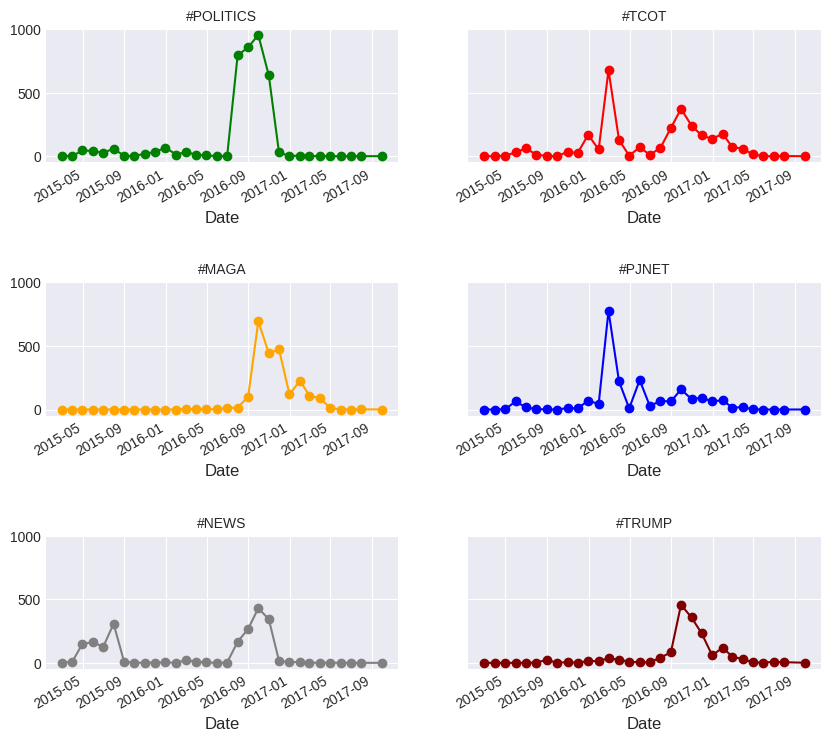

In [35]:
plt.style.use('seaborn-darkgrid')
# create a 3 by 2 subplot to hold the trend of all hashtags
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = subplots(nrows = 3,
                                                       ncols = 2,
                                                       sharey = True,
                                                       figsize = (10,8))

plt.subplots_adjust(top = 1, hspace = 0.9)
hashtag_count_df_pivot['#politics'].plot(linestyle = "-", marker = "o", color = "green",ax = ax1)
ax1.set_title("#POLITICS", fontsize = 10)
ax1.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#tcot'].plot(linestyle = "-", marker = "o", color = "red", ax = ax2)
ax2.set_title("#TCOT", fontsize = 10)
ax2.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#MAGA'].plot(linestyle = "-", marker = "o", color = "orange", ax = ax3)
ax3.set_title("#MAGA", fontsize = 10)
ax3.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#PJNET'].plot(linestyle = "-", marker = "o", color = "blue",ax = ax4)
ax4.set_title("#PJNET", fontsize = 10)
ax4.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#news'].plot(linestyle = "-", marker = "o", color = "grey", ax = ax5)
ax5.set_title("#NEWS", fontsize = 10)
ax5.set_xlabel('Date', fontsize = 12)

hashtag_count_df_pivot['#Trump'].plot(linestyle = "-", marker = "o", color = "maroon", ax = ax6)
ax6.set_title("#TRUMP", fontsize = 10)
ax6.set_xlabel('Date', fontsize = 12)

**We see that most of these hashtags picked up in the year 2016 near March or later in July, close to the elections! This is also the time when alleged interference by Russian trolls started!** 

We see the largest peak in the **#politics**.  Maybe tweeting about politics got these trolls the largest following!

## Lets look at user mentions!
We already have the user mentions in a column in our **troll** dataframe! Let's create a dataframe with each user's tweet with the user mentions against it! 

In [36]:
troll['user_mentions'].head(10)

0               [0]
1               [0]
2               [0]
3               [0]
4               [0]
5    [ModicaGiunta]
6               [0]
7               [0]
8               [0]
9               [0]
Name: user_mentions, dtype: object

Let's now separate out the *user_key* and *user_mentions* columns from this dataframe!

In [37]:
user_mention = troll.loc[:, ['user_key', 'user_mentions']]
user_mention.head(6)

,user_key,user_mentions
0,ryanmaxwell_1,[0]
1,detroitdailynew,[0]
2,cookncooks,[0]
3,queenofthewo,[0]
4,mrclydepratt,[0]
5,giselleevns,[ModicaGiunta]


Remove rows where no user is mentioned! These are rows where the *user_mentions* column has a [0].

In [38]:
row_remove_mask = user_mention['user_mentions'].map(lambda x: "0" in x)

This gives us a T/F series - **True** where *user_mentions* are empty, **False** otherwise. How many rows are we removing?

In [39]:
np.sum(row_remove_mask)

162275

Let's remove these rows!

In [40]:
# keep rows where row_remove_mask is FALSE
user_mention_df = user_mention.loc[~row_remove_mask, :]
user_mention_df.reset_index(drop = True, inplace = True)
user_mention_df.head(10)

,user_key,user_mentions
0,giselleevns,[ModicaGiunta]
1,laurabaeley,"[21WIRE, KellyannePolls]"
2,brianaregland,[Migos]
3,michellearry,[sendavidperdue]
4,melvinsroberts,"[WorldOfHashtags, TheRyanAdams, bryanadams]"
5,puredavie,[midnight]
6,hyddrox,"[FoxNews, CNN]"
7,hyddrox,[greta]
8,willisbonnerr,[trueblackpower]
9,lagonehoe,[amjoyshow]


This gives us each user and the user they mentioned. For meaningful analysis, we want it such that each row has a user against **one** user and not multiple! Let's do that now!

In [41]:
# for each row, create a one-to-one tuple of user and his user mention
new_list = []
for i in range(len(user_mention_df)):
    for j in user_mention_df.loc[i, "user_mentions"]:
        (a,b) = (user_mention_df.loc[i, 'user_key'], j)
        new_list.append((a,b))

We now have a tuple with each user -> user_mention value. Lets get a dataframe from this!

In [42]:
user_mention_clean_df = pd.DataFrame({"User_Key": [a for (a,b) in new_list],
                                     "User_Mention": [b for (a,b) in new_list]})
user_mention_clean_df.head()

,User_Key,User_Mention
0,giselleevns,ModicaGiunta
1,laurabaeley,21WIRE
2,laurabaeley,KellyannePolls
3,brianaregland,Migos
4,michellearry,sendavidperdue


## Hashtags based clustering
Can we get some cluster of users who use similar hashtags? First we will create a dataframe which holds the *user_key* and the *tweet_hashtags*.

In [43]:
# create a df with user and hashtags in one tweet
user_hashtag_df = troll[['user_key', 'tweet_hashtags']]
user_hashtag_df = user_hashtag_df.reset_index(drop = True)

In [44]:
# Lets remove the rows where no hashtags were used
row_remove_mask = user_hashtag_df['tweet_hashtags'].map(lambda x: "0" in x)

# Remove these rows from the user hashtag df
user_hashtag_df_clean = user_hashtag_df.loc[~row_remove_mask, :]
user_hashtag_df_clean.reset_index(drop = True, inplace = True)
user_hashtag_df_clean.head()

,user_key,tweet_hashtags
0,ryanmaxwell_1,[#IslamKills]
1,queenofthewo,[#ChristmasAftermath]
2,hiimkhloe,"[#BlackLivesMatter, #BlackPressDay]"
3,jasper_fly,[#myfarewellwordswouldbe]
4,giselleevns,[#My2017BiggestHope]


In [45]:
# separate out all hashtags used.
all_hashtags = user_hashtag_df_clean['tweet_hashtags']

In [47]:
# get hashtags that qualify - present in 50 or more tweets
qualify_hashtags_mask = (hashtag_counts >= 50)
qualify_hashtags = hashtag_counts[qualify_hashtags_mask]

# remove the "0" hashtags
qualify_hashtags = qualify_hashtags.drop(labels = "0")
qualify_hashtags.head()

#politics    3638
#tcot        2799
#MAGA        2306
#PJNET       2121
#news        2046
dtype: int64

In [48]:
# lets count the number of times these qualified hashtags appear in the tweets with hashtags
count_dict = {}

for i in qualify_hashtags.index.values:
    count_hash = all_hashtags.map(lambda x: x.count(i))
    count_dict[i] = count_hash

# create a dataframe from the hashtags and their counts in tweets
hashtag_count_df = pd.DataFrame(count_dict)

# concatenate this dataframe with the hashtag_count_df
user_hashtag_count_df = pd.concat([user_hashtag_df_clean, hashtag_count_df], axis = 1)

Okay, for each user now we have the count of the qualifying hashtags in each of their tweets. Lets group this by the user and get a sum of the counts of hashtags used!

In [49]:
# group by user_key and get the sum of times they have used a hashtag
user_hashtag_group = user_hashtag_count_df.groupby('user_key').agg('sum').reset_index()
user_hashtag_group.head()

<ipython-input-49-f385b193a735>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  user_hashtag_group = user_hashtag_count_df.groupby('user_key').agg('sum').reset_index()


,user_key,#politics,#tcot,#MAGA,#PJNET,#news,#Trump,#Merkelmussbleiben,#TrumpForPresident,#WakeUpAmerica,...,#TheResistance,#NotMyPresident,#IfHillaryBecomesPresident,#WeedTV,#AndThatsHowIWentViral,#demndebate,#WednesdayWisdom,#PJnet,#BernieSanders,#TexasJihad
0,4mysquad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6druz,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,_billy_moyer_,4,30,0,16,2,3,0,0,9,...,0,0,0,0,0,0,0,1,0,0
3,_nickluna_,4,80,41,89,14,35,0,30,36,...,0,0,0,0,0,2,0,3,0,0
4,_sashalapin,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
user_tweet_df = troll.loc[:, ['user_key', 'tweet_text_only']]
user_tweet_df.head()

,user_key,tweet_text_only
0,ryanmaxwell_1,Are you trying to say that there were no terro...
1,detroitdailynew,"Clinton: Trump should’ve apologized more, atta..."
2,cookncooks,Who was/is the best president of the past 25 y...
3,queenofthewo,I don't have to guess your religion!
4,mrclydepratt,Pence and his lawyers decided which of his off...


In [51]:
users = pd.read_csv('users.csv')
users.head(2)

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",Wed Jan 07 04:38:02 +0000 2009,17.0,670.0,13.0
1,100345056.0,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0


We see information about *user_id*, *user_name*, *follower_count*, *language*, etc.

In [52]:
# First we get a count of users from each time-zone and language combination!
user_loc_lang = users.groupby(['time_zone', 'lang'])['id'].agg('count').reset_index()
user_loc_lang.rename(columns = {'id':'user_count'}, inplace = True)
user_loc_lang.head(5)

,time_zone,lang,user_count
0,Abu Dhabi,en,1
1,Arizona,en,1
2,Baku,en,2
3,Baku,ru,4
4,Berlin,de,10


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'User profile')

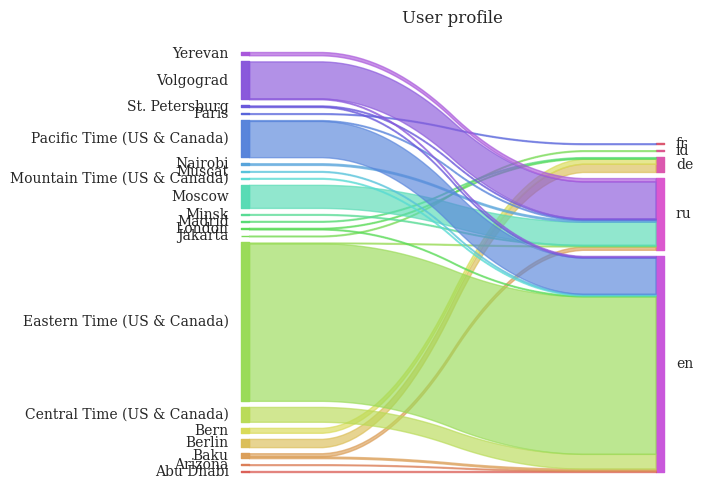

In [54]:
# This is a custom package installed within kaggle 
!pip install pySankey
from pySankey import sankey
sankey.sankey(user_loc_lang['time_zone'],
              user_loc_lang['lang'],
              leftWeight = user_loc_lang['user_count'],
              rightWeight = user_loc_lang['user_count'], 
              fontsize = 10)
plt.title("User profile")

The above chart shows the user profile in the troll tweet users. **English speaking** users come from **US, Canada & Arizona**. *Russian* speaking users come from *Moscow, Volgograd, Yerevan and Minsk*! All french speaking users are from Paris. This makes sense!

In [55]:
# First we convert the created_at to datetime and then extract the date from this
users['created_at'] = pd.to_datetime(users['created_at'])
users['created_at_date'] = pd.to_datetime(users['created_at'].dt.date)

users['created_at_date'].head()

0   2009-01-07
1   2009-12-29
2   2011-02-04
3   2011-02-09
4   2011-12-29
Name: created_at_date, dtype: datetime64[ns]

Text(0, 0.5, 'Count of accounts created')

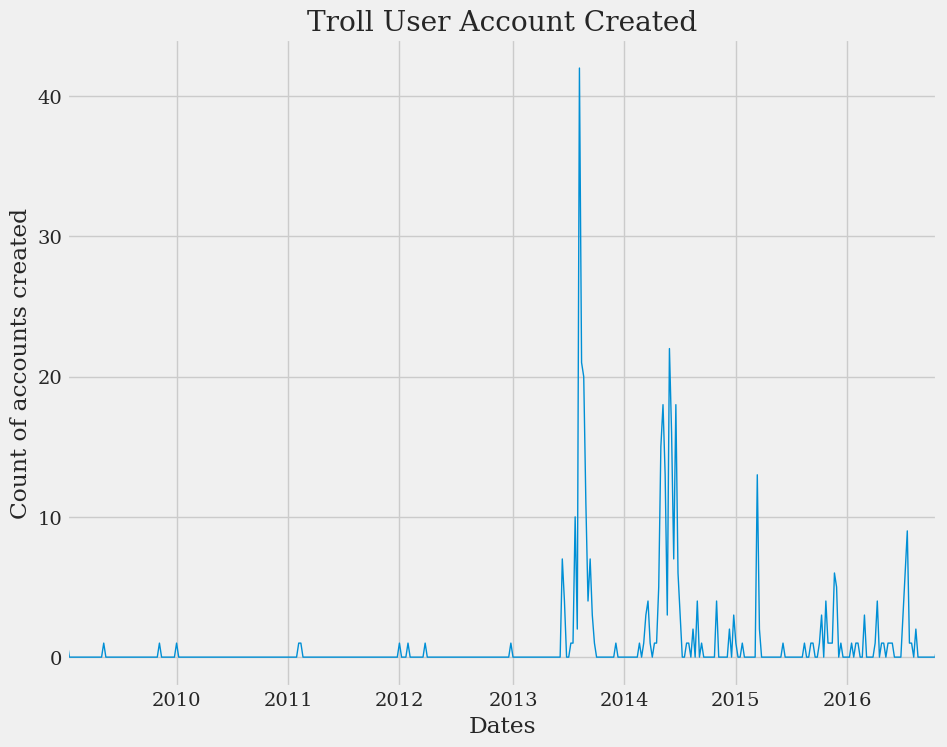

In [56]:
user_created = users.groupby('created_at_date')['id'].agg('count')

plt.style.use('fivethirtyeight')
user_created.resample('W',kind = 'period').sum().\
plot(linestyle = '-', figsize = (10,8), linewidth = 1)
title('Troll User Account Created')
xlabel('Dates')
ylabel('Count of accounts created')

In [57]:
user_tweet_count = troll.groupby('user_id')['text'].agg('count').reset_index()
user_tweet_count.rename(columns = {'text':'Tweet_count'}, inplace = True)

In [58]:
user_tweet_count_df = user_tweet_count.merge(users,
                                      left_on = 'user_id',
                                      right_on = 'id')
user_tweet_count_df.head(2)

,user_id,Tweet_count,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count,created_at_date
0,18710816.0,31,18710816.0,near Utah Ave & Lighthouse an,Robby Delaware,304.0,11484.0,Pacific Time (US & Canada),False,en,RobbyDelaware,"I support the free movement of people, ideas a...",2009-01-07 04:38:02+00:00,17.0,670.0,13.0,2009-01-07
1,38875764.0,1,38875764.0,St-Petersburg,Olga,14.0,219.0,St. Petersburg,False,ru,Leecory,here i am~,2009-05-09 15:58:34+00:00,0.0,6.0,0.0,2009-05-09


A tweet count of the top 10 tweeting users follows-

<ipython-input-59-bed41f4aa194>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(0, 0.5, 'User Name')

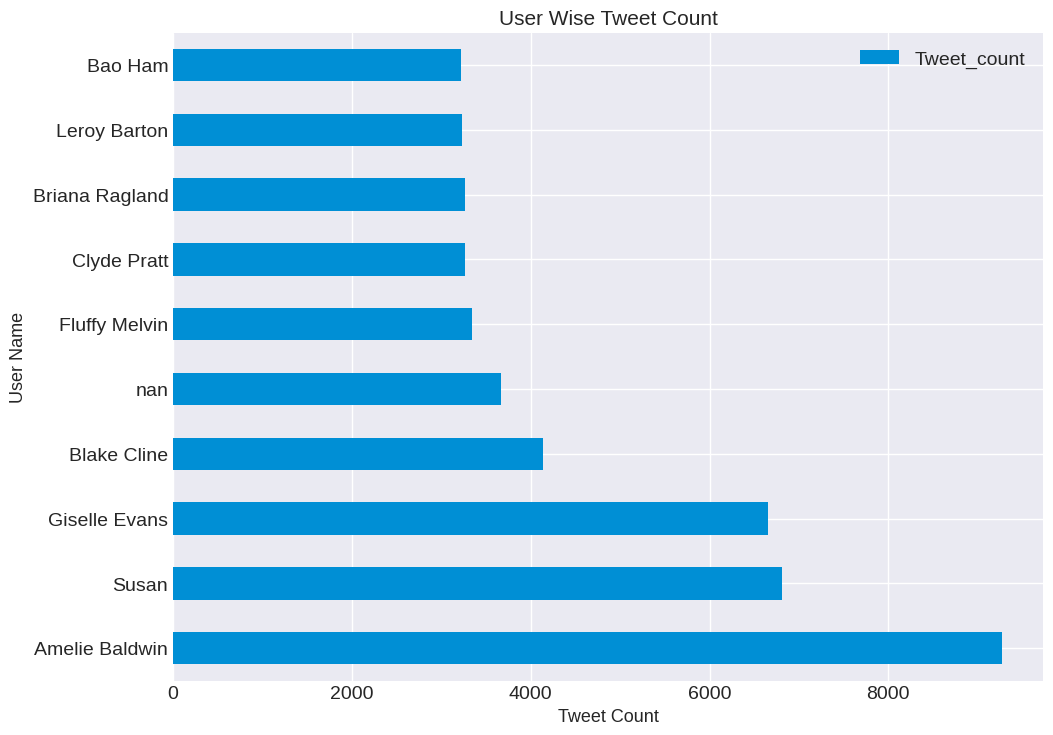

In [59]:
plt.style.use('seaborn-darkgrid')
user_tweet_count_df[['name', 'Tweet_count']].sort_values('Tweet_count', ascending = False)[:10].\
set_index('name').plot(kind = 'barh', figsize = (10,8))
title('User Wise Tweet Count', fontsize = 15)
xlabel('Tweet Count', fontsize = 13)
ylabel('User Name', fontsize = 13)

## Do a larger number of tweets mean higher number of followers?
Lets see if there is a linear correlation here!

In [60]:
correl = user_tweet_count_df['Tweet_count'].corr(user_tweet_count_df['followers_count'])
print("{0:.2f}".format(correl))

-0.03


<ipython-input-61-cdcbe68e611b>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Text(6000, 80000, 'Correlation is: -0.03')

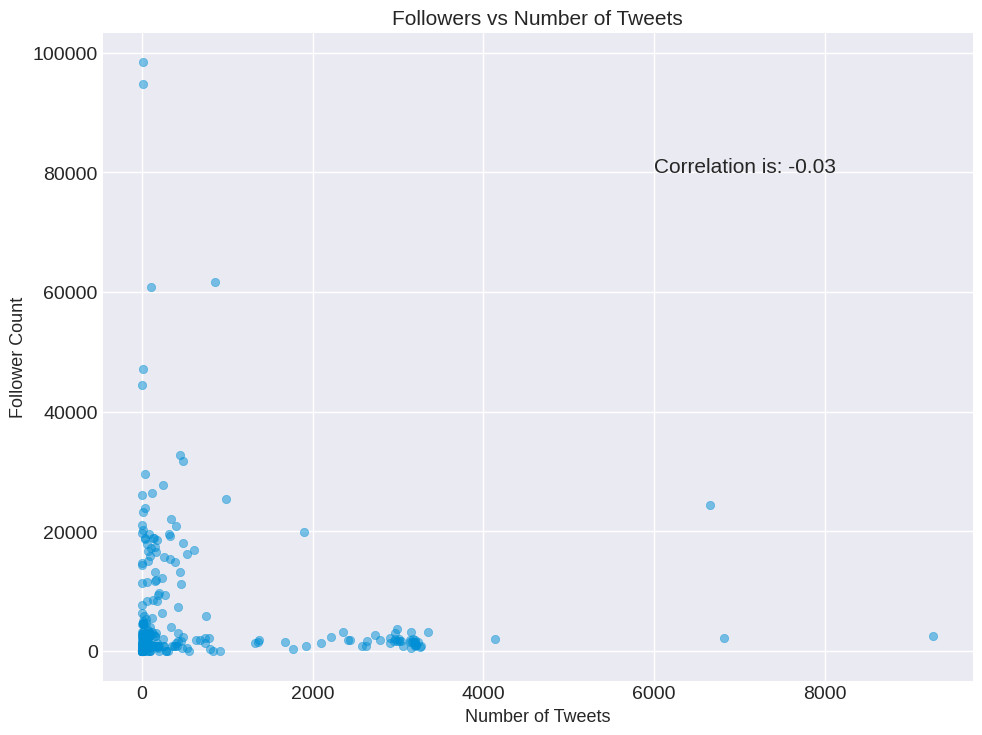

In [61]:
# Drawing a scatterplot of the tweet count with number of followers
fig = plt.figure(figsize = (10,8))
plt.style.use('seaborn-darkgrid')
plt.scatter(user_tweet_count_df['Tweet_count'], 
        user_tweet_count_df['followers_count'],
       marker = 'o',
       alpha = 0.5)
plt.title("Followers vs Number of Tweets", fontsize = 15)
plt.xlabel("Number of Tweets", fontsize = 13)
plt.ylabel("Follower Count", fontsize = 13)
plt.text(6000, 80000, s = "Correlation is: {0:.2f}".format(correl), fontsize = 15)

In [62]:
user_tweet_count_df['lang'].value_counts()

en    273
ru     90
de     18
id      1
fr      1
es      1
Name: lang, dtype: int64

In [63]:
user_tweet_count_df[['name', 'lang', 'followers_count']].sort_values('followers_count', 
                                                               ascending = False)[:10]

,name,lang,followers_count
292,Максим Дементьев,ru,98412.0
6,Рамзан Кадыров,ru,94773.0
295,Jenna Abrams,en,61609.0
288,New York City Today,en,60897.0
281,Мюсли Лаврова,ru,47080.0
146,Холодная Война 2.0,ru,44470.0
234,Politweecs,en,32846.0
287,Washington Online,en,31729.0
297,Pigeon Today,en,29524.0
189,New Orleans Online,en,27745.0
